#  - Prediction Project - eBay Website

In [2]:
#Import libraries
import csv
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Web Scraping

In [43]:
def get_page(url):
    response = requests.get(url)
    
    if not response.ok:
        print('Server responded:', response.status_code)
    else:
        soup = BeautifulSoup(response.text,'lxml')
    
        return soup

In [44]:
def get_detail_data(soup): #Title , Price , Quantity SOLD, Type Product, Positive Feedback,Seller Name, Is Top Rated ? 
    try:
        title = soup.find('h1', id= 'itemTitle').text.replace('Details about  \xa0', '')
    except:
        title=''
        
    try:
        try:
            try:
                p = soup.find('span', id='prcIsum').text.strip().replace('$', '') ##Rid off the spaces,also split the string by space                        
            except:
                p = soup.find('span', id='prcIsum_bidPrice').text.strip().replace('$', '') # also get tid of $ sign
        except:
            p = soup.find('span', id='mm-saleDscPrc').text.strip().replace('$', '')
             
        currency , price = p.split(' ') ##to get 2 elements
    except:  
        currency = ''
        price=''
        
    try: 
        try: 
            sold = soup.find('span', class_='vi-qtyS-hot-red').find('a').text.strip().split(' ')[0].replace('/xa0', '').replace(',', '')
        ##Get the first element, also get rid off the non-breaking space in string
        except: 
            sold = soup.find('a', class_='vi-txt-underline').text.strip().split(' ')[0].replace('/xa0', '').replace(',', '')
    except: 
        sold = '0'
        
    try:
        type_product = soup.find('span' , itemprop="name").text
    except: 
        type_product = ''
        
    try:
        p_feedback = soup.find('div', class_='ux-seller-section__item--seller').find(class_='ux-textspans--PSEUDOLINK').find_next('span').find_next('span').text
    except:
        p_feedback = ''
        
    try:
        seller_name = soup.find('span', class_='ux-textspans--PSEUDOLINK ux-textspans--BOLD').text
    except:
        seller_name = ''
        
    try:
        is_top_rated = soup.find('div', class_='ux-section-icon-with-details__data-title').text
    except:
        is_top_rated = 'No'
        
    
        
    ##Packing the data:
    data = {
        'title': title,
        'price': price,
        'currency': currency,
        'total sold': sold,
        'product type': type_product,
        'positive feedbacks': p_feedback,
        'seller': seller_name,
        'top rated': is_top_rated
    }
    
    return data

    

In [45]:
def get_index_data(soup): 
    try: ##Sarching for the 'href' attribute
        links = soup.find_all('a' , class_='s-item__link')
    except:
        links = []
        
    urls = [item.get('href') for item in links] ##Gets the links only
    
    return urls

#### Create our csv file

In [55]:
def write_csv(data, url):
    with open('new_output_loop10_#2.csv', 'a',encoding="utf-8") as csvfile: ##pass appand argument
        writer = csv.writer(csvfile) ##takes our csv file as argument
        row = [data['title'] ,data['price'], data['currency'],data['product type'], 
               data['total sold'],data['seller'],data['positive feedbacks'],data['top rated'], url]
        writer.writerow(row)

In [56]:
url_template='https://www.ebay.com/sch/i.html?_nkw=%s&_pgn=%d&rt=nc'
categories = ["#Games","PS5","XBOX","Calvin","Bosch","Intel","Macbook","Tablet","Print","Monitor","Guitar","Zoom",
             "Camera","Digital","Jewerly","Puzzles","Vintages","Cardio","Bench",
             "Sport","Electronics","Fashion","Health","Home-Garden","Computer","Music","All",
            "Collectibles-Art","Business-Industrial",
             "Toys","Mobile","Desk","Case","Watch","Speaker",
            "Apple","Samsung","Xiaomi","LG","Microsoft","Shoes","Pet","Super","Kors","bracelet","Top","TV"
             ]

products = []
for cat in categories:
    for count in range(0,10):
        url = url_template%(cat,count) ##Checked.
        products += get_index_data(get_page(url)) ##Products checked.
        
        
        
    
     
for link in products:
    data = get_detail_data(get_page(link))
    #print(data)
    write_csv(data,link)
    


    


    

Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server responded: 404
Server res

#### Read data

In [3]:
all_data = pd.read_csv('C:\\Users\\David\\PythonJupiter\\eBay Project\\new_output_final.csv',skipinitialspace = True)
all_data.head() ## Check


,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's
0,War 3010: The Revolution (Super Nintendo SNES)...,44.95,US,Video Games & Consoles,0.0,mjjsviii,273.0,No,1/7/2021 22:30,"682 Chestnut St, Boston, MA 02215",https://www.ebay.com/itm/194673457070?hash=ite...
1,Super Mario 3D All-Stars RARE Physical Copy NE...,59.99,US,Video Games & Consoles,0.0,consumerconfidencecorp,80.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/265472328462?epid=604...
2,Super Smash Bros Ultimate Nintendo Switch Game,39,US,Video Games & Consoles,0.0,misslita84,96.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/324965089975?hash=ite...
3,Hot Wheels ID Cars 2022 New -Your Choice - Upd...,3.99,US,Toys & Hobbies,2261.0,super-mini-wheels,23613.0,Top Rated,1/30/2021 9:27,"333 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/373056472521?hash=ite...
4,SUPER PINK HEART MAKEUP Roblox Series 8 Celebr...,24.75,US,Toys & Hobbies,42.0,boston_championship_fan,8995.0,No,1/29/2021 13:03,"381 Wilson St, San Francisco, CA 94016",https://www.ebay.com/itm/124908074303?hash=ite...


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             8026 non-null   object 
 1   Price             8021 non-null   object 
 2   Currency          8021 non-null   object 
 3   Category          8026 non-null   object 
 4   Quantity Ordered  8041 non-null   float64
 5   Seller Name       8019 non-null   object 
 6   Rating            8019 non-null   float64
 7   Top Rated         8042 non-null   object 
 8   Order Date        8019 non-null   object 
 9   Purchase Address  8020 non-null   object 
 10  Link's            8042 non-null   object 
dtypes: float64(2), object(9)
memory usage: 691.2+ KB


###### We can see the missing values in the rows, also we can see the diff datatypes cols, we'll convert few cols to 'int' 'float' 'string' & more...

In [5]:
all_data.describe(include='all')

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's
count,8026,8021,8021,8026,8041.000000,8019,8.019000e+03,8042,8019,8020,8042
unique,6154,2189,11,41,NaN,3738,NaN,2,7544,7602,6777
top,Sony PS5 Blu-Ray Edition Console - White,0.99,US,Computers/Tablets & Networking,NaN,sarahs.decore,NaN,No,Order Date,Purchase Address,https://www.ebay.com/itm/01920391?epid=2603981...
freq,37,272,4479,1620,NaN,93,NaN,4416,13,14,15
mean,NaN,NaN,NaN,NaN,185.343117,NaN,3.475929e+04,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2046.029825,NaN,1.457026e+05,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,-1.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,4.720000e+02,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.658000e+03,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,10.000000,NaN,1.515050e+04,NaN,NaN,NaN,NaN


###### Lets Start work !

## Clean up the data ! 

##### Drop rows of NAN

In [6]:
# Find NAN Values

nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna() ## drop  of NaN values
all_data.head()

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's
354,Sony Alpha A7SIII A 7S III A7S III 12.1 MP Dig...,"4,250.00",US,Cameras & Photo,0.0,liuxue-2011,107.0,No,NaN,NaN,https://www.ebay.com/itm/265473087912?epid=100...
517,PACIFIC RIM: UPRISING (BLU-RAY + DVD)☆●NO DIGI...,3,US,Movies & TV,0.0,asncu85,92.0,No,NaN,Purchase Address,https://www.ebay.com/itm/403377753700?hash=ite...
702,NaN,NaN,NaN,NaN,0.0,NaN,NaN,No,2/12/2021 7:28,"544 11th St, Seattle, WA 98101",https://www.ebay.com/itm/01920391?epid=2603981...
733,Handmade Women Dandelion Flower Drop Hook Earr...,2.6,C,Jewelry & Watches,364.0,zifashop2015,51023.0,Top Rated,NaN,NaN,https://www.ebay.com/itm/313558216661?hash=ite...
1112,NaN,NaN,NaN,NaN,0.0,NaN,NaN,No,2/30/2021 8:22:00 PM,"396 Forest St, Boston, MA 02215",https://www.ebay.com/itm/01920391?epid=2603981...


,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's
0,War 3010: The Revolution (Super Nintendo SNES)...,44.95,US,Video Games & Consoles,0.0,mjjsviii,273.0,No,1/7/2021 22:30,"682 Chestnut St, Boston, MA 02215",https://www.ebay.com/itm/194673457070?hash=ite...
1,Super Mario 3D All-Stars RARE Physical Copy NE...,59.99,US,Video Games & Consoles,0.0,consumerconfidencecorp,80.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/265472328462?epid=604...
2,Super Smash Bros Ultimate Nintendo Switch Game,39,US,Video Games & Consoles,0.0,misslita84,96.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/324965089975?hash=ite...
3,Hot Wheels ID Cars 2022 New -Your Choice - Upd...,3.99,US,Toys & Hobbies,2261.0,super-mini-wheels,23613.0,Top Rated,1/30/2021 9:27,"333 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/373056472521?hash=ite...
4,SUPER PINK HEART MAKEUP Roblox Series 8 Celebr...,24.75,US,Toys & Hobbies,42.0,boston_championship_fan,8995.0,No,1/29/2021 13:03,"381 Wilson St, San Francisco, CA 94016",https://www.ebay.com/itm/124908074303?hash=ite...


#### Get rid of text in 'Order Date' column

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='na']
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']


##### Get rid of chars in the column 'Price'

In [8]:
#all_data['Price'] = all_data['Price'].replace('$', '').astype(float)
#all_data['Price'] = all_data['Price'].str.replace('$', '').astype(float)
#all_data['Price'] = all_data['Price'].str.replace(',', '').str.replace('$', '').astype(float)

#def conv_to_float(x):
 #   try:
  #      return float(x.replace(',', ''))
   # except:
    #    return 'Error'
    #all_data['Price'] = all_data['Price'].apply(lambda x: conv_to_float(x))
    #all_data = all_data[all_data['Price'] != 'Error']
    #all_data['Price'].astype(str).apply(str).str.replace(',', '')



In [9]:
all_data.Price = (all_data.Price.str.replace(',', '').astype(float)) ##Remove the comma, and convert the types into a float

In [10]:
all_data['Price'] ## Check -V
print(all_data.dtypes)

Title                object
Price               float64
Currency             object
Category             object
Quantity Ordered    float64
Seller Name          object
Rating              float64
Top Rated            object
Order Date           object
Purchase Address     object
Link's               object
dtype: object


In [11]:
all_data.Price.head() ## Check

0    44.95
1    59.99
2    39.00
3     3.99
4    24.75
Name: Price, dtype: float64

##### Make columns correct type

In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price'] = pd.to_numeric(all_data['Price'])

## Argument data with additional columns

In [13]:
print(all_data[all_data['Order Date'].isnull()]) ## Check the NAN Values 

Empty DataFrame
Columns: [Title, Price, Currency, Category, Quantity Ordered, Seller Name, Rating, Top Rated , Order Date, Purchase Address, Link's]
Index: []


#### Add month column

In [14]:
#First Option:
#all_data['Month'] = all_data['Order Date'].str[0:1]
#all_data['Month'] = all_data['Month'].astype('int32')
#all_data.head()

#Sec & Better way:
all_data['Month'] = all_data['Order Date'].str.split('/').str[0].astype(int)
all_data.head()


,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month
0,War 3010: The Revolution (Super Nintendo SNES)...,44.95,US,Video Games & Consoles,0.0,mjjsviii,273.0,No,1/7/2021 22:30,"682 Chestnut St, Boston, MA 02215",https://www.ebay.com/itm/194673457070?hash=ite...,1
1,Super Mario 3D All-Stars RARE Physical Copy NE...,59.99,US,Video Games & Consoles,0.0,consumerconfidencecorp,80.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/265472328462?epid=604...,1
2,Super Smash Bros Ultimate Nintendo Switch Game,39.00,US,Video Games & Consoles,0.0,misslita84,96.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/324965089975?hash=ite...,1
3,Hot Wheels ID Cars 2022 New -Your Choice - Upd...,3.99,US,Toys & Hobbies,2261.0,super-mini-wheels,23613.0,Top Rated,1/30/2021 9:27,"333 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/373056472521?hash=ite...,1
4,SUPER PINK HEART MAKEUP Roblox Series 8 Celebr...,24.75,US,Toys & Hobbies,42.0,boston_championship_fan,8995.0,No,1/29/2021 13:03,"381 Wilson St, San Francisco, CA 94016",https://www.ebay.com/itm/124908074303?hash=ite...,1


##### Add City Column

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month,City
0,War 3010: The Revolution (Super Nintendo SNES)...,44.95,US,Video Games & Consoles,0.0,mjjsviii,273.0,No,1/7/2021 22:30,"682 Chestnut St, Boston, MA 02215",https://www.ebay.com/itm/194673457070?hash=ite...,1,Boston (MA)
1,Super Mario 3D All-Stars RARE Physical Copy NE...,59.99,US,Video Games & Consoles,0.0,consumerconfidencecorp,80.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/265472328462?epid=604...,1,Los Angeles (CA)
2,Super Smash Bros Ultimate Nintendo Switch Game,39.00,US,Video Games & Consoles,0.0,misslita84,96.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/324965089975?hash=ite...,1,Los Angeles (CA)
3,Hot Wheels ID Cars 2022 New -Your Choice - Upd...,3.99,US,Toys & Hobbies,2261.0,super-mini-wheels,23613.0,Top Rated,1/30/2021 9:27,"333 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/373056472521?hash=ite...,1,Los Angeles (CA)
4,SUPER PINK HEART MAKEUP Roblox Series 8 Celebr...,24.75,US,Toys & Hobbies,42.0,boston_championship_fan,8995.0,No,1/29/2021 13:03,"381 Wilson St, San Francisco, CA 94016",https://www.ebay.com/itm/124908074303?hash=ite...,1,San Francisco (CA)


In [16]:
import matplotlib.pyplot as plt 
import numpy as np 

## Data Exploration !

### Question 1: What was the best month for sales ? How much was earned that month ?

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price'].astype('float')

In [18]:
all_data.groupby(['Month']).sum()

,Price,Quantity Ordered,Rating,Sales
Month,,,,
1,40875.17,251163.0,15340912.0,1984091.89
2,6385.09,152419.0,16028893.0,480779.24
3,77140.78,61209.0,7535232.0,2812928.94
4,113327.89,65854.0,28947715.0,3908050.50
5,45724.42,5791.0,3860647.0,694658.65
6,15195.35,49419.0,20098811.0,1480941.91
7,146123.17,640852.0,79931712.0,5228716.44
8,265018.00,57211.0,6397879.0,9775734.24
9,85112.47,2292.0,60436034.0,990036.49


#### The Best Month for sales is November, which earned 16,539,818$ 

range(1, 13)


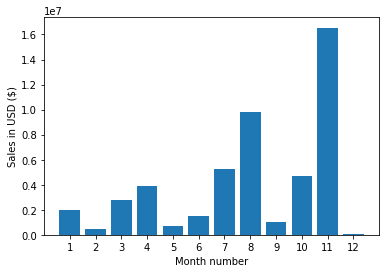

In [19]:
months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

###### We will try to investigate what is happening there in August and November months, Compared to the other month's

### Question 2: Which city bought the most ?

In [20]:
all_data.groupby(['City']).sum()

,Price,Quantity Ordered,Rating,Month,Sales
City,,,,,
Atlanta (GA),76899.83,101477.0,19318501.0,4158,3490501.43
Austin (TX),52258.97,31715.0,11766219.0,2664,2092655.92
Boston (MA),118191.38,167045.0,32083774.0,5839,10195365.27
Dallas (TX),82722.07,138280.0,28717264.0,3842,3436645.31
Los Angeles (CA),207581.02,207901.0,47108471.0,8579,5750660.16
New York City (NY),143174.46,204193.0,33722005.0,7215,7141710.83
Portland (ME),12483.57,39261.0,2321699.0,626,1361582.78
Portland (OR),54718.76,60165.0,19117265.0,2754,1563557.17
San Francisco (CA),285933.82,425154.0,62970884.0,12546,10331793.65


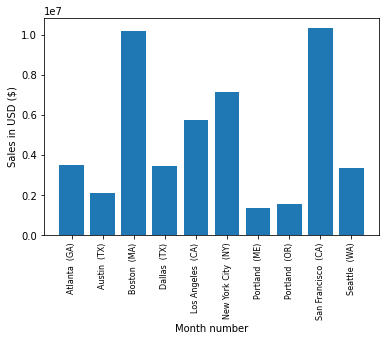

In [21]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

###### We'll check what brings San-Francisco & Boston to increased consmption , while the others no.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [22]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date'],errors='coerce' ).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date'], errors='coerce').dt.minute
all_data['Count'] = 1
all_data.head()

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month,City,Sales,Hour,Minute,Count
0,War 3010: The Revolution (Super Nintendo SNES)...,44.95,US,Video Games & Consoles,0.0,mjjsviii,273.0,No,1/7/2021 22:30,"682 Chestnut St, Boston, MA 02215",https://www.ebay.com/itm/194673457070?hash=ite...,1,Boston (MA),0.00,22.0,30.0,1
1,Super Mario 3D All-Stars RARE Physical Copy NE...,59.99,US,Video Games & Consoles,0.0,consumerconfidencecorp,80.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/265472328462?epid=604...,1,Los Angeles (CA),0.00,14.0,38.0,1
2,Super Smash Bros Ultimate Nintendo Switch Game,39.00,US,Video Games & Consoles,0.0,misslita84,96.0,No,1/12/2021 14:38,"669 Spruce St, Los Angeles, CA 90001",https://www.ebay.com/itm/324965089975?hash=ite...,1,Los Angeles (CA),0.00,14.0,38.0,1
3,Hot Wheels ID Cars 2022 New -Your Choice - Upd...,3.99,US,Toys & Hobbies,2261.0,super-mini-wheels,23613.0,Top Rated,1/30/2021 9:27,"333 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/373056472521?hash=ite...,1,Los Angeles (CA),9021.39,9.0,27.0,1
4,SUPER PINK HEART MAKEUP Roblox Series 8 Celebr...,24.75,US,Toys & Hobbies,42.0,boston_championship_fan,8995.0,No,1/29/2021 13:03,"381 Wilson St, San Francisco, CA 94016",https://www.ebay.com/itm/124908074303?hash=ite...,1,San Francisco (CA),1039.50,13.0,3.0,1


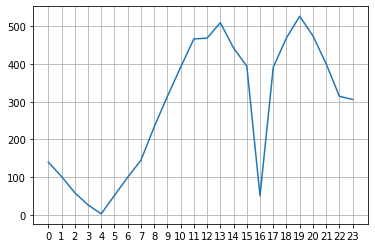

In [23]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


###### My recommendation is slightly before 12am or 7pm

### Question 4: What product sold the most? Why do you think it sold the most?

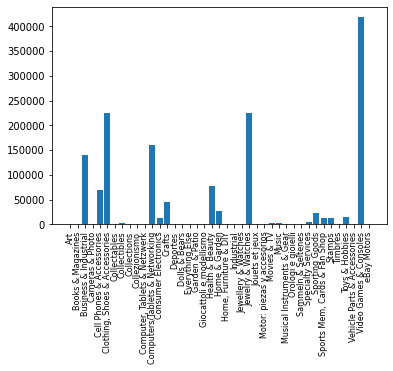

In [24]:
product_group = all_data.groupby('Category')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

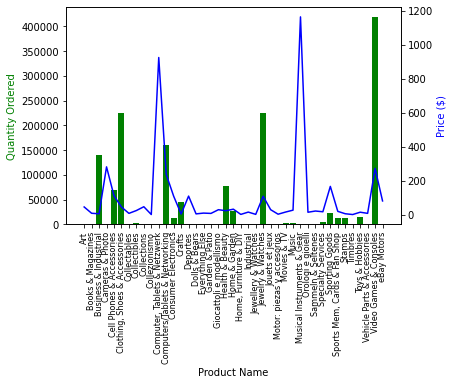

In [25]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
import warnings
warnings.filterwarnings("ignore")

prices = all_data.groupby('Category').mean()['Price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

###### What we see in first look: we got the amount sold (Green) and the price (Blue) each, they kind of like correlate and thats kind of we're trying to like prove our hypothesis, whenever the Queantity Order is high, the Price each is low. 
###### Lets keep moving,we'll examine and investigate more in depth later !


### Question 5: How the 'Rating' effect the 'Top Seller' method ?

###### Let's focus on "50" Top sellers Rating" on ebay:

In [26]:
all_data = all_data.sort_values(by=['Rating'], ascending=False)
all_data.head(50)





,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month,City,Sales,Hour,Minute,Count
4317,Paul McCartney: Many Years From Now by Barry M...,8.99,GBP,Books & Magazines,52.0,worldofbooks08,7603388.0,No,7/11/2021 8:36,"879 1st St, Dallas, TX 75001",https://www.ebay.com/itm/392009942964?epid=918...,7,Dallas (TX),467.48,8.0,36.0,1
4499,"Puccini: Manon Lescaut, , Good",4.28,GBP,Music,0.0,webuybooks,1489603.0,Top Rated,7/27/2021 19:33,"472 Lakeview St, Boston, MA 02215",https://www.ebay.com/itm/133976021336?epid=100...,7,Boston (MA),0.00,19.0,33.0,1
4498,"Revisited, Rick Wakeman, Good Import",6.85,GBP,Music,0.0,webuybooks,1489603.0,Top Rated,7/12/2021 10:06,"520 Lincoln St, San Francisco, CA 94016",https://www.ebay.com/itm/363668981375?_trkparm...,7,San Francisco (CA),0.00,10.0,6.0,1
4409,"Sacred Symphonies, , Good",3.66,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/1/2021 6:70:00 PM,"17 Pine St, Portland, OR 97035",https://www.ebay.com/itm/133974558535?epid=306...,7,Portland (OR),0.00,NaN,NaN,1
4435,"White Blood Cells, White Stripes, the, Good Im...",17.97,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/12/2021 11:58,"511 8th St, Boston, MA 02215",https://www.ebay.com/itm/133976291530?_trkparm...,7,Boston (MA),0.00,11.0,58.0,1
4464,"Spanish and Portuguese Harpsichord Music, , Go...",8.38,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/26/2021 13:20,"39 Ridge St, Los Angeles, CA 90001",https://www.ebay.com/itm/133974972234?epid=114...,7,Los Angeles (CA),0.00,13.0,20.0,1
4450,"Stranded, , Good Original recording remastered, O",3.63,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/18/2021 11:26,"438 10th St, Portland, OR 97035",https://www.ebay.com/itm/363668510349?epid=398...,7,Portland (OR),0.00,11.0,26.0,1
4449,"Holiday Diary: the Music for 1 & 2 Pianos, , Good",27.51,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/1/2021 11:05,"495 Main St, Dallas, TX 75001",https://www.ebay.com/itm/133975309919?_trkparm...,7,Dallas (TX),0.00,11.0,5.0,1
4448,"The Arranger's Touch (4CD), Various Artists, G...",11.09,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/13/2021 18:33,"563 13th St, Los Angeles, CA 90001",https://www.ebay.com/itm/363669678365?epid=434...,7,Los Angeles (CA),0.00,18.0,33.0,1
4440,"Plays Music of Harold Arlen & Irving Berlin, G...",3.81,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/25/2021 12:32,"178 8th St, Los Angeles, CA 90001",https://www.ebay.com/itm/154767440952?epid=970...,7,Los Angeles (CA),0.00,12.0,32.0,1


In [27]:
all_data.head(50).groupby('Rating')['Rating'].count()

Rating
653220.0     19
662420.0      1
667351.0      2
718968.0      1
1489599.0     5
1489600.0     2
1489601.0     3
1489602.0    14
1489603.0     2
7603388.0     1
Name: Rating, dtype: int64

In [28]:
all_data.head(50).groupby('Top Rated ')['Top Rated '].count()

Top Rated 
No            20
Top Rated     30
Name: Top Rated , dtype: int64

Text(0.5, 0.98, 'Does "Rating" really affect on Top Sellers ?')

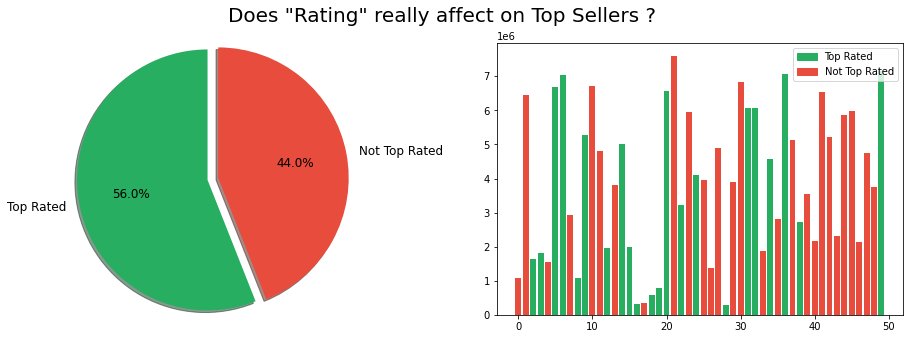

In [29]:
df = pd.DataFrame(
    {
        "Rating": np.random.randint(0,7603388,size=200),
        "Top Rated ": [random.choice(['Top Rated', 'No']) for rated in range(0,200)]
    }
)

#taking first 100 rows
rating_series = df.head(50).copy()
#assigning color to the values, so you could use it in bar() plot
rating_series["color"] = rating_series["Top Rated "].map({"Top Rated": "#27AE60", "No": "#E74C3C"})
#checking if there were no NaNs
rating_series["color"].value_counts(dropna=False)

#Output-100:

#E74C3C    53
#FFC300    47
#Name: color, dtype: int64

#1st plot
top_series = rating_series.groupby('Top Rated ')['Top Rated '].count()
top_index = ['Top Rated', 'Not Top Rated']
top_colors = ['#27AE60', '#E74C3C']

fig, axs = plt.subplots(1,2, figsize=(16,5))
axs[0].pie(top_series.values, labels=top_index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.2, colors=top_colors, textprops={'fontsize':12})

#2nd plot
axs[1].bar(rating_series.index, rating_series["Rating"], color = rating_series["color"])
axs[1].legend(handles=[mpatches.Patch(color='#27AE60', label='Top Rated'),
               mpatches.Patch(color='#E74C3C', label='Not Top Rated')])

##SubTitle
fig.suptitle('Does "Rating" really affect on Top Sellers ?' , fontsize=20)


# Classification

In [240]:
# Import necceseery liberies

import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Identify & Wrangling  our data !

In [241]:
all_data.describe()

,Price,Quantity Ordered,Rating,Month,Sales,Hour,Minute,Count
count,7983.000000,7983.000000,7.983000e+03,7983.000000,7.983000e+03,6776.000000,6776.000000,7983.0
mean,140.066803,186.252161,3.473620e+04,6.566454,6.100803e+03,14.458383,26.956316,1.0
std,584.008226,2053.324849,1.458746e+05,3.336857,4.585931e+04,5.546453,17.308331,0.0
min,0.000000,0.000000,-1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,1.0
25%,7.980000,0.000000,4.715000e+02,4.000000,0.000000e+00,11.000000,12.000000,1.0
50%,24.990000,0.000000,2.649000e+03,7.000000,0.000000e+00,14.000000,26.000000,1.0
75%,119.995000,10.000000,1.515050e+04,10.000000,1.978900e+02,19.000000,38.000000,1.0
max,31950.000000,77924.000000,7.603388e+06,12.000000,1.260148e+06,23.000000,59.000000,1.0


In [242]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 4317 to 5732
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             7983 non-null   object 
 1   Price             7983 non-null   float64
 2   Currency          7983 non-null   object 
 3   Category          7983 non-null   object 
 4   Quantity Ordered  7983 non-null   float64
 5   Seller Name       7983 non-null   object 
 6   Rating            7983 non-null   float64
 7   Top Rated         7983 non-null   object 
 8   Order Date        7983 non-null   object 
 9   Purchase Address  7983 non-null   object 
 10  Link's            7983 non-null   object 
 11  Month             7983 non-null   int32  
 12  City              7983 non-null   object 
 13  Sales             7983 non-null   float64
 14  Hour              6776 non-null   float64
 15  Minute            6776 non-null   float64
 16  Count             7983 non-null   int64

##### 1. Take the relevant data for prediction
##### 2. Get rid of uneccessery dtype `Object`
##### 3. Create a binary col, 1 - 0 for any group

In [243]:
# check unique values in dataset
all_data.apply(lambda x: len(x.unique()))

Title               6135
Price               2186
Currency              11
Category              41
Quantity Ordered     553
Seller Name         3732
Rating              2599
Top Rated              2
Order Date          7522
Purchase Address    7581
Link's              6749
Month                 12
City                  10
Sales               2146
Hour                  25
Minute                61
Count                  1
is_sold                2
dtype: int64

In [244]:
#check for null values
all_data.isnull().sum()

Title                  0
Price                  0
Currency               0
Category               0
Quantity Ordered       0
Seller Name            0
Rating                 0
Top Rated              0
Order Date             0
Purchase Address       0
Link's                 0
Month                  0
City                   0
Sales                  0
Hour                1207
Minute              1207
Count                  0
is_sold                0
dtype: int64

In [245]:
# check for categorical attributes & groupby them to one list
cat_col = []
for x in all_data.dtypes.index:
    if all_data.dtypes[x] == 'object':
        cat_col.append(x)
    
cat_col

['Title',
 'Currency',
 'Category',
 'Seller Name',
 'Top Rated ',
 'Order Date',
 'Purchase Address',
 "Link's",
 'City']

In [507]:
df_pred = all_data.copy()

In [508]:
df_pred = df_pred.drop(columns = ['Title','Seller Name',"Link's",'Purchase Address','Order Date','Minute','Count'])


In [509]:
df_pred.head(100)

,Price,Currency,Category,Quantity Ordered,Rating,Top Rated,Month,City,Sales,Hour,is_sold
4317,8.99,GBP,Books & Magazines,52.0,7603388.0,No,7,Dallas (TX),467.48,8.0,True
4499,4.28,GBP,Music,0.0,1489603.0,Top Rated,7,Boston (MA),0.00,19.0,False
4498,6.85,GBP,Music,0.0,1489603.0,Top Rated,7,San Francisco (CA),0.00,10.0,False
4409,3.66,GBP,Music,0.0,1489602.0,Top Rated,7,Portland (OR),0.00,NaN,False
4435,17.97,GBP,Music,0.0,1489602.0,Top Rated,7,Boston (MA),0.00,11.0,False
...,...,...,...,...,...,...,...,...,...,...,...
1686,945.99,EUR,Sporting Goods,21.0,585661.0,Top Rated,3,Seattle (WA),19865.79,10.0,True
201,3.97,US,Video Games & Consoles,12.0,558104.0,Top Rated,1,San Francisco (CA),47.64,23.0,True
169,13.97,US,Video Games & Consoles,10.0,558104.0,Top Rated,1,San Francisco (CA),139.70,21.0,True
4854,29.22,US,Video Games & Consoles,11.0,558099.0,Top Rated,7,New York City (NY),321.42,19.0,True


In [510]:
hour_mean = all_data.pivot_table(values = "Hour", index= 'Title')
hour_mean

,Hour
Title,
"Intel Core i7-10700 Processor (4.8 GHz, 8 Cores, Socket LGA1200)",17.0
"10-1-Tablet-WITHTECH-3G PAD, OCTA CORE, 4GB RAM, DUAL SIM PLATA",7.0
"2 x LED FULL HD 24"" Dual Monitor Cheap Gaming Monitor LED 1080p Computer 5MS",14.5
"Lugol's Iodine Solution 5%, 1 oz Thyroid Health Potassium Iodidde 10%",19.0
"Xbox 360 Games Call of duty, Cabela's, borderlands, Lego... Pick from List",13.5
...,...
🔥Xbox One Series X 1TB Brand New in Box 🚀 FAST FREE SAME DAY SHIPPING ⚡️,17.0
🔥Xbox One Series X 1TB Brand New in Box 🚀 Fast Ship,11.0
🚚 💨 2 DAY SHIPPING Microsoft Xbox One S 1TB Console - White NEW IN RETAIL BOX,10.0


In [511]:
df_pred.dropna(inplace=True)

In [512]:
df_pred.isnull().sum()

Price               0
Currency            0
Category            0
Quantity Ordered    0
Rating              0
Top Rated           0
Month               0
City                0
Sales               0
Hour                0
is_sold             0
dtype: int64

##### We Got a clear data , lets care  of the cat which contains `String dType`

In [513]:
CUR = pd.get_dummies(df_pred['Currency'])
CUR

,425,45.5,48,62,69,79,AU,C,EUR,GBP,US
4317,0,0,0,0,0,0,0,0,0,1,0
4499,0,0,0,0,0,0,0,0,0,1,0
4498,0,0,0,0,0,0,0,0,0,1,0
4435,0,0,0,0,0,0,0,0,0,1,0
4464,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5581,0,0,0,0,0,0,0,0,0,1,0
5571,0,0,0,0,0,0,0,0,0,0,1
1284,0,0,0,0,0,0,0,0,0,0,1
5517,0,0,0,0,0,0,0,0,1,0,0


In [514]:
CUR = pd.get_dummies(df_pred['Currency']).iloc[: , 8:]
CUR

,EUR,GBP,US
4317,0,1,0
4499,0,1,0
4498,0,1,0
4435,0,1,0
4464,0,1,0
...,...,...,...
5581,0,1,0
5571,0,0,1
1284,0,0,1
5517,1,0,0


In [515]:
CAT = pd.get_dummies(df_pred['Category'])
CAT

,Art,Books & Magazines,Business & Industrial,Cameras & Photo,Cell Phones & Accessories,"Clothing, Shoes & Accessories",Collectables,Collectibles,Collections,Collezionismo,...,Sammeln & Seltenes,Specialty Services,Sporting Goods,"Sports Mem, Cards & Fan Shop",Stamps,Timbres,Toys & Hobbies,Vehicle Parts & Accessories,Video Games & Consoles,eBay Motors
4317,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1284,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [516]:
#Check the highest cat
new_Cat = all_data['Category'].value_counts().head(8)
new_Cat

Computers/Tablets & Networking    1611
Video Games & Consoles            1502
Jewelry & Watches                  686
Home & Garden                      677
Clothing, Shoes & Accessories      666
Sporting Goods                     427
Toys & Hobbies                     406
Sports Mem, Cards & Fan Shop       344
Name: Category, dtype: int64

In [517]:
##Keep only the relevant cat

CAT = pd.get_dummies(df_pred['Category']).drop(columns = ['Art','Books & Magazines','Business & Industrial',
                                                    'Cameras & Photo','Collectables','Collectibles','Collections',
                                                    'Collezionismo','Crafts','Deportes','Everything Else','Sammeln & Seltenes',
                                                    'Specialty Services','Stamps','Timbres'])
CAT

,Cell Phones & Accessories,"Clothing, Shoes & Accessories",Computers/Tablets & Networking,Consumer Electronics,Dolls & Bears,Garden & Patio,Health & Beauty,Home & Garden,"Home, Furniture & DIY",Industrial,...,Movies & TV,Music,Musical Instruments & Gear,Orologi e gioielli,Sporting Goods,"Sports Mem, Cards & Fan Shop",Toys & Hobbies,Vehicle Parts & Accessories,Video Games & Consoles,eBay Motors
4317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4499,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4435,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4464,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1284,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [518]:
TOP = pd.get_dummies(df_pred['Top Rated '], drop_first=True)
TOP

,Top Rated
4317,0
4499,1
4498,1
4435,1
4464,1
...,...
5581,0
5571,0
1284,0
5517,0


In [519]:
CIT = pd.get_dummies(df_pred['City'])
CIT

,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
4317,0,0,0,1,0,0,0,0,0,0
4499,0,0,1,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,1,0
4435,0,0,1,0,0,0,0,0,0,0
4464,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5581,1,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,1,0,0,0,0,0
1284,0,0,0,0,1,0,0,0,0,0
5517,0,0,1,0,0,0,0,0,0,0


In [520]:
SOL = pd.get_dummies(df_pred['is_sold'], drop_first=True)
SOL

,True
4317,1
4499,0
4498,0
4435,0
4464,0
...,...
5581,0
5571,0
1284,0
5517,0


In [521]:
#True = is sold or no , our target !

In [522]:
df_pred = pd.concat([df_pred,SOL,CAT,CUR,TOP,CIT],axis=1)

In [523]:
df_pred.head(5)

,Price,Currency,Category,Quantity Ordered,Rating,Top Rated,Month,City,Sales,Hour,...,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
4317,8.99,GBP,Books & Magazines,52.0,7603388.0,No,7,Dallas (TX),467.48,8.0,...,0,0,0,1,0,0,0,0,0,0
4499,4.28,GBP,Music,0.0,1489603.0,Top Rated,7,Boston (MA),0.00,19.0,...,0,0,1,0,0,0,0,0,0,0
4498,6.85,GBP,Music,0.0,1489603.0,Top Rated,7,San Francisco (CA),0.00,10.0,...,0,0,0,0,0,0,0,0,1,0
4435,17.97,GBP,Music,0.0,1489602.0,Top Rated,7,Boston (MA),0.00,11.0,...,0,0,1,0,0,0,0,0,0,0
4464,8.38,GBP,Music,0.0,1489602.0,Top Rated,7,Los Angeles (CA),0.00,13.0,...,0,0,0,0,1,0,0,0,0,0


In [524]:
#Drop and keep the relevant data for the log reg
df_pred.drop(['Currency','Category','Top Rated ','City','is_sold'],axis=1,inplace=True)

#### Get our final data set

In [525]:
df_pred.head()

,Price,Quantity Ordered,Rating,Month,Sales,Hour,True,Cell Phones & Accessories,"Clothing, Shoes & Accessories",Computers/Tablets & Networking,...,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
4317,8.99,52.0,7603388.0,7,467.48,8.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4499,4.28,0.0,1489603.0,7,0.00,19.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4498,6.85,0.0,1489603.0,7,0.00,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4435,17.97,0.0,1489602.0,7,0.00,11.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4464,8.38,0.0,1489602.0,7,0.00,13.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [526]:
df_pred.rename(columns={ df_pred.columns[6]: "is_sold" }, inplace = True)


In [527]:
df_pred.head(100)

,Price,Quantity Ordered,Rating,Month,Sales,Hour,is_sold,Cell Phones & Accessories,"Clothing, Shoes & Accessories",Computers/Tablets & Networking,...,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
4317,8.99,52.0,7603388.0,7,467.48,8.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4499,4.28,0.0,1489603.0,7,0.00,19.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4498,6.85,0.0,1489603.0,7,0.00,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4435,17.97,0.0,1489602.0,7,0.00,11.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4464,8.38,0.0,1489602.0,7,0.00,13.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,3.99,0.0,501872.0,4,0.00,12.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2030,7.15,3.0,501872.0,4,21.45,17.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2173,2.21,0.0,501872.0,4,0.00,20.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2172,14.63,0.0,501872.0,4,0.00,13.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

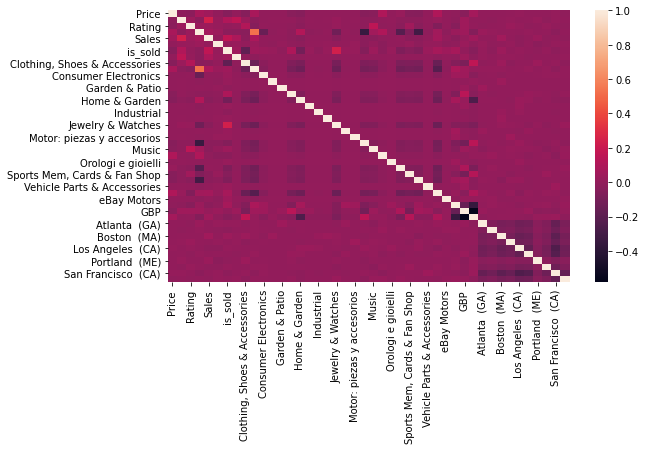

In [545]:
plt.figure(figsize=(9,5))
sns.heatmap(df_pred.corr())

## Train & Test Our Data

In [528]:
y2=df_pred["is_sold"] ## Target
X2= df_pred.drop("is_sold",axis=1)

In [529]:
from sklearn.model_selection import train_test_split

In [530]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [531]:
logmodel=LogisticRegression().fit(X2_train,y2_train)

In [532]:
logmodel

LogisticRegression()

In [533]:
#Prediction part:
predictions = logmodel.predict(X2_test)

In [534]:
from sklearn.metrics import classification_report

In [535]:
classification_report(y2_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       824\n           1       1.00      1.00      1.00       532\n\n    accuracy                           1.00      1356\n   macro avg       1.00      1.00      1.00      1356\nweighted avg       1.00      1.00      1.00      1356\n'

In [536]:
from sklearn.metrics import confusion_matrix

In [537]:
confusion_matrix(y2_test,predictions) # How accurate the values are

array([[824,   0],
       [  2, 530]], dtype=int64)

#### Confusion Matrix Explaination:

In [538]:
from sklearn.metrics import accuracy_score

In [539]:
print("Accuracy is:")

accuracy_score(y2_test,predictions)

Accuracy is:


0.9985250737463127

In [540]:
from sklearn.metrics import precision_score

In [541]:
print("Precision is:")
precision_score(y2_test,predictions)

Precision is:


1.0

In [542]:
from sklearn.metrics import recall_score

In [544]:
print("Recall is:")
metrics.recall_score(y2_test, predictions)

Recall is:


0.9962406015037594

### Exploratory Data Analysis

<AxesSubplot:xlabel='Category', ylabel='Density'>

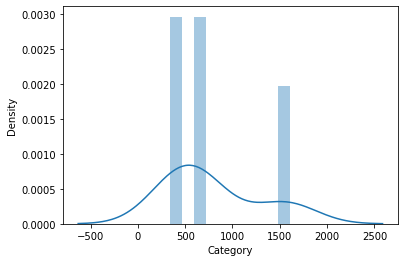

In [66]:
sns.distplot(new_Cat,bins=10)

In [67]:
new_Cat.value_counts()

344     1
677     1
406     1
686     1
1611    1
666     1
427     1
1502    1
Name: Category, dtype: int64

<AxesSubplot:ylabel='Density'>

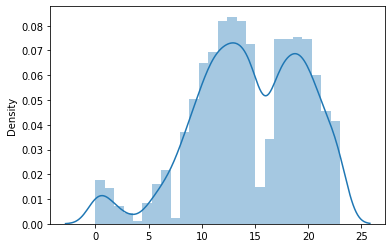

In [63]:
sns.distplot(hour_mean)

<AxesSubplot:xlabel='City', ylabel='Density'>

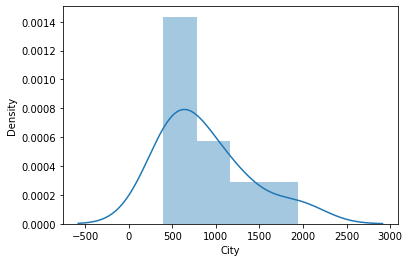

In [64]:
sns.distplot(new_City)

<AxesSubplot:xlabel='Top Rated ', ylabel='count'>

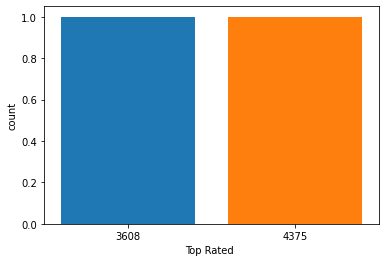

In [191]:
sns.countplot(new_df['new_Rated'], saturation=10)

### Create our `is_sold` Cat, should be above .

In [68]:
(all_data[all_data['Quantity Ordered'] == 0].shape[0] , all_data[all_data['Quantity Ordered'] > 0].shape[0] )


(4724, 3259)

In [ ]:
(all_data[all_data['Quantity Ordered'] == 0].shape[0] , all_data[all_data['Quantity Ordered'] > 0].shape[0] )


In [70]:
all_data

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month,City,Sales,Hour,Minute,Count,is_sold
4317,Paul McCartney: Many Years From Now by Barry M...,8.99,GBP,Books & Magazines,52.0,worldofbooks08,7603388.0,No,7/11/2021 8:36,"879 1st St, Dallas, TX 75001",https://www.ebay.com/itm/392009942964?epid=918...,7,Dallas (TX),467.48,8.0,36.0,1,True
4499,"Puccini: Manon Lescaut, , Good",4.28,GBP,Music,0.0,webuybooks,1489603.0,Top Rated,7/27/2021 19:33,"472 Lakeview St, Boston, MA 02215",https://www.ebay.com/itm/133976021336?epid=100...,7,Boston (MA),0.00,19.0,33.0,1,False
4498,"Revisited, Rick Wakeman, Good Import",6.85,GBP,Music,0.0,webuybooks,1489603.0,Top Rated,7/12/2021 10:06,"520 Lincoln St, San Francisco, CA 94016",https://www.ebay.com/itm/363668981375?_trkparm...,7,San Francisco (CA),0.00,10.0,6.0,1,False
4409,"Sacred Symphonies, , Good",3.66,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/1/2021 6:70:00 PM,"17 Pine St, Portland, OR 97035",https://www.ebay.com/itm/133974558535?epid=306...,7,Portland (OR),0.00,NaN,NaN,1,False
4435,"White Blood Cells, White Stripes, the, Good Im...",17.97,GBP,Music,0.0,webuybooks,1489602.0,Top Rated,7/12/2021 11:58,"511 8th St, Boston, MA 02215",https://www.ebay.com/itm/133976291530?_trkparm...,7,Boston (MA),0.00,11.0,58.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,xbox 1 s console used,120.50,US,Video Games & Consoles,0.0,garama-9985,0.0,No,8/27/2021 14:15,"321 Jefferson St, Los Angeles, CA 90001",https://www.ebay.com/itm/384627013499?hash=ite...,8,Los Angeles (CA),0.00,14.0,15.0,1,False
1284,Vintage School House Rock T Shirt Size Large S...,41.00,US,"Clothing, Shoes & Accessories",0.0,vamps_77,0.0,No,3/20/2021 15:29,"320 Walnut St, Los Angeles, CA 90001",https://www.ebay.com/itm/234353848610?_trkparm...,3,Los Angeles (CA),0.00,15.0,29.0,1,False
5517,Xbox One S 1TB,160.00,EUR,Video Games & Consoles,0.0,devand_7515,0.0,No,8/18/2021 0:11,"969 Johnson St, Boston, MA 02215",https://www.ebay.com/itm/373819768004?hash=ite...,8,Boston (MA),0.00,0.0,11.0,1,False
7862,Samsung LED Monitor.,75.00,GBP,Computers/Tablets & Networking,0.0,scco_2262,0.0,No,11/5/2021 23:59,"994 Forest St, Los Angeles, CA 90001",https://www.ebay.com/itm/353821854026?hash=ite...,11,Los Angeles (CA),0.00,23.0,59.0,1,False


# Attempt to predict the sales of product with `Regression Linear`

#### Present our data for predict with Hist

In [138]:
all_data.head().T

,4317,4499,4498,4409,4435
Title,Paul McCartney: Many Years From Now by Barry M...,"Puccini: Manon Lescaut, , Good","Revisited, Rick Wakeman, Good Import","Sacred Symphonies, , Good","White Blood Cells, White Stripes, the, Good Im..."
Price,8.99,4.28,6.85,3.66,17.97
Currency,GBP,GBP,GBP,GBP,GBP
Category,Books & Magazines,Music,Music,Music,Music
Quantity Ordered,52.0,0.0,0.0,0.0,0.0
Seller Name,worldofbooks08,webuybooks,webuybooks,webuybooks,webuybooks
Rating,7603388.0,1489603.0,1489603.0,1489602.0,1489602.0
Top Rated,No,Top Rated,Top Rated,Top Rated,Top Rated
Order Date,7/11/2021 8:36,7/27/2021 19:33,7/12/2021 10:06,7/1/2021 6:70:00 PM,7/12/2021 11:58
Purchase Address,"879 1st St, Dallas, TX 75001","472 Lakeview St, Boston, MA 02215","520 Lincoln St, San Francisco, CA 94016","17 Pine St, Portland, OR 97035","511 8th St, Boston, MA 02215"


In [139]:
print(all_data[all_data['Order Date'].isnull()]) ## Check the NAN Values 

Empty DataFrame
Columns: [Title, Price, Currency, Category, Quantity Ordered, Seller Name, Rating, Top Rated , Order Date, Purchase Address, Link's, Month, City, Sales, Hour, Minute, Count, is_sold]
Index: []


In [140]:
numeric_feature_list = []
categoric_features_list = []

In [141]:
all_data.Currency.value_counts()

US      4456
GBP     1652
AU       754
EUR      727
C        386
69         2
62         2
79         1
45.5       1
425        1
48         1
Name: Currency, dtype: int64

In [142]:
all_data.Category.value_counts()

Computers/Tablets & Networking    1611
Video Games & Consoles            1502
Jewelry & Watches                  686
Home & Garden                      677
Clothing, Shoes & Accessories      666
Sporting Goods                     427
Toys & Hobbies                     406
Sports Mem, Cards & Fan Shop       344
Health & Beauty                    343
Movies & TV                        325
Music                              317
Art                                285
Cameras & Photo                     82
Consumer Electronics                69
Stamps                              68
Musical Instruments & Gear          37
Business & Industrial               31
Collezionismo                       29
Collectibles                        14
Crafts                              12
Specialty Services                   8
Cell Phones & Accessories            7
eBay Motors                          7
Sammeln & Seltenes                   5
Vehicle Parts & Accessories          3
Collections              

In [143]:
all_data['Quantity Ordered'].value_counts()

0.0      4724
1.0       373
2.0       226
3.0       147
4.0       134
         ... 
528.0       1
208.0       1
264.0       1
500.0       1
946.0       1
Name: Quantity Ordered, Length: 553, dtype: int64

In [144]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].loc[~(all_data==0).all(axis=1)]

<AxesSubplot:>

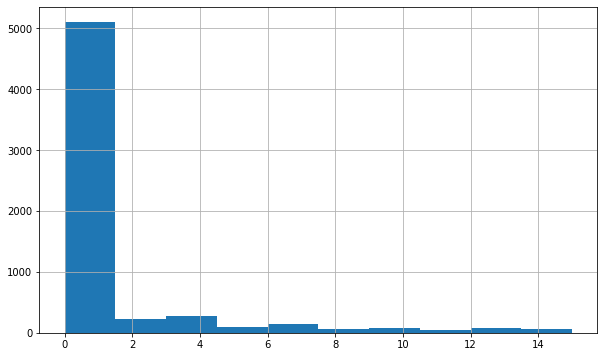

In [145]:
all_data['Quantity Ordered'][all_data['Quantity Ordered'] <=15].hist(bins=10)

In [146]:
all_data['Rating'].describe()

count    7.983000e+03
mean     3.473620e+04
std      1.458746e+05
min     -1.000000e+00
25%      4.715000e+02
50%      2.649000e+03
75%      1.515050e+04
max      7.603388e+06
Name: Rating, dtype: float64

<AxesSubplot:>

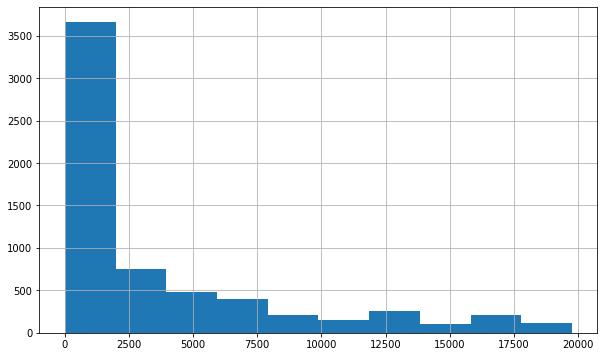

In [147]:
all_data['Rating'][all_data['Rating'] <=20000].hist(bins=10)

<AxesSubplot:xlabel='Rating', ylabel='Quantity Ordered'>

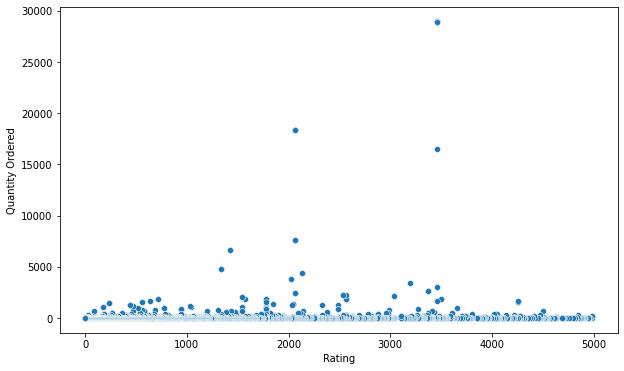

In [148]:
sns.scatterplot(data=all_data[all_data['Rating'] <=5000], x="Rating", y="Quantity Ordered")

#### Create our data for Predict stage:

In [152]:
all_data_01 = all_data[all_data['Currency']=='US']
all_data_01

,Title,Price,Currency,Category,Quantity Ordered,Seller Name,Rating,Top Rated,Order Date,Purchase Address,Link's,Month,City,Sales,Hour,Minute,Count,is_sold
7100,"10.1"" WiFi Tablet Android 10 HD 8G+512G 10 Cor...",114.59,US,Computers/Tablets & Networking,871.0,theperfectpart,667351.0,Top Rated,11/7/2021 14:56,"541 Elm St, Boston, MA 02215",https://www.ebay.com/itm/203248108230?hash=ite...,11,Boston (MA),99807.89,14.0,56.0,1,True
7167,"10.1"" WiFi Tablet Android 10 HD 8G+512G 10 Cor...",114.59,US,Computers/Tablets & Networking,871.0,theperfectpart,667351.0,Top Rated,11/18/2021 12:12,"115 Dogwood St, Boston, MA 02215",https://www.ebay.com/itm/203248108230?hash=ite...,11,Boston (MA),99807.89,12.0,12.0,1,True
5933,Calvin Klein Women's Gown Blue Size 4 Cap Slee...,47.49,US,"Clothing, Shoes & Accessories",0.0,retailfashionoutlet,653220.0,No,9/16/2021 9:02,"484 1st St, San Francisco, CA 94016",https://www.ebay.com/itm/373830940683?_trkparm...,9,San Francisco (CA),0.00,9.0,2.0,1,False
5873,Calvin Klein Women's Dress Blossom Pink Size 1...,54.97,US,"Clothing, Shoes & Accessories",0.0,retailfashionoutlet,653220.0,No,9/26/2021 11:07,"709 12th St, Boston, MA 02215",https://www.ebay.com/itm/313802639908?_trkparm...,9,Boston (MA),0.00,11.0,7.0,1,False
5994,Calvin Klein Women Dress Black Size 2 Sheath G...,13.99,US,"Clothing, Shoes & Accessories",0.0,retailfashionoutlet,653220.0,No,9/5/2021 6:95:00 PM,"945 Cedar St, San Francisco, CA 94016",https://www.ebay.com/itm/353830979955?hash=ite...,9,San Francisco (CA),0.00,NaN,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,L’AGENCE Black Atticus Floral Print Trench Coa...,599.00,US,"Clothing, Shoes & Accessories",0.0,simple-n-beyond,0.0,No,5/1/2021 2:02,"186 Lake St, Los Angeles, CA 90001",https://www.ebay.com/itm/403379712755?hash=ite...,5,Los Angeles (CA),0.00,2.0,2.0,1,False
318,Camera,899.00,US,Cameras & Photo,0.0,jaeag-0_6,0.0,No,1/29/2021 11:37,"267 Willow St, San Francisco, CA 94016",https://www.ebay.com/itm/403379308111?hash=ite...,1,San Francisco (CA),0.00,11.0,37.0,1,False
7763,monitor 165hz,150.00,US,Computers/Tablets & Networking,0.0,lorbel9,0.0,No,11/28/2021 19:32,"662 Cedar St, Boston, MA 02215",https://www.ebay.com/itm/304277464994?hash=ite...,11,Boston (MA),0.00,19.0,32.0,1,False
5571,xbox 1 s console used,120.50,US,Video Games & Consoles,0.0,garama-9985,0.0,No,8/27/2021 14:15,"321 Jefferson St, Los Angeles, CA 90001",https://www.ebay.com/itm/384627013499?hash=ite...,8,Los Angeles (CA),0.00,14.0,15.0,1,False


In [153]:
min_freq=0.0115 ## Get rid of the lowest cat (None sellling cat) , better for the linear reg later.
series = pd.value_counts(all_data_01.Category)
mask = (series/series.sum()).lt(min_freq)
all_data_01.Category  = pd.Series(np.where(all_data_01.Category.isin(series[mask].index), 'other', all_data_01.Category))

In [154]:
all_data_01.Category.value_counts()

Computers/Tablets & Networking    536
Video Games & Consoles            527
Clothing, Shoes & Accessories     291
Jewelry & Watches                 169
Movies & TV                       158
Sports Mem, Cards & Fan Shop      154
Toys & Hobbies                    109
Music                             101
Sporting Goods                     81
Health & Beauty                    74
other                              62
Art                                56
Home & Garden                      41
Stamps                             37
Name: Category, dtype: int64

In [155]:
numeric_feature_list = ['Price','Quantity Ordered','Rating']
categoric_features_list = ['Category','Top Rated ','Month','City']

In [156]:
X_all = all_data_01[numeric_feature_list]
X_all.shape

(4456, 3)

In [157]:
df_cat = pd.concat([pd.get_dummies(all_data_01[categoric_features_list]).iloc[:,:-1] for col in categoric_features_list], axis=1, keys = categoric_features_list)

In [158]:
df_cat.shape

(4456, 104)

In [159]:
X_all = pd.concat([df_cat,X_all],axis=1)
X_all.shape

(4456, 107)

<AxesSubplot:>

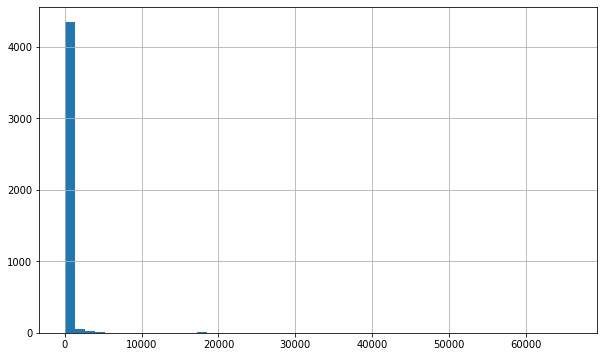

In [160]:
X_all['Quantity Ordered'].hist(bins=50)

In [161]:
X1 = X_all.drop(['Quantity Ordered'],axis=1)
y1 = X_all['Quantity Ordered']

In [162]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [171]:
print (X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(3564, 106) (3564,) (892, 106) (892,)


In [172]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X1_train, y1_train)
pred = reg.predict(X1_test)

In [173]:
def mape_vectorized_v2(y_true, prediction): 
    #solution to problem of division by 0
    mask = y_true != 0
    return (np.fabs(y_true - prediction)/y_true)[mask].mean()*100 

In [174]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [175]:
def show_regresion_error(predictions, true_values):
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    
    print("Mean squared error (test): %.3f" % mean_squared_error(true_values, predictions, squared=False))
    print("Mean absolute error (test): %.3f" %mean_absolute_error(true_values, predictions ))
    print("Mean absolute percentage error: %.3f" %mape_vectorized_v2(true_values, predictions))
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

Mean squared error (test): 1354.297
Mean absolute error (test): 356.424
Mean absolute percentage error: 4642.922


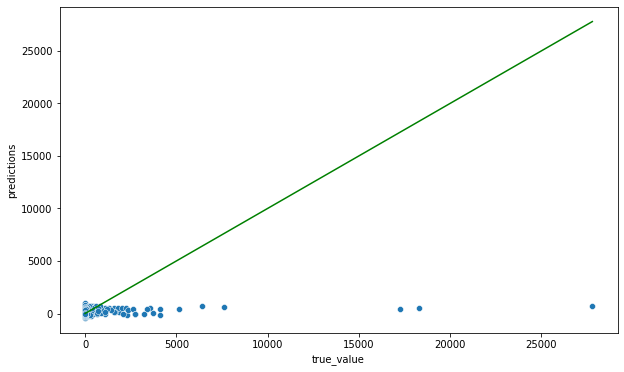

In [176]:
show_regresion_error(pred, y1_test)

In [83]:
X_all['predictions'] = reg.predict(X)

<AxesSubplot:>

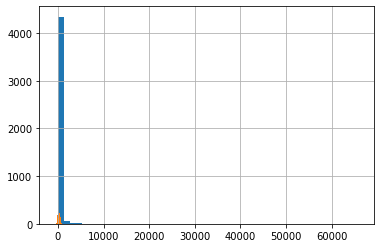

In [84]:
X_all['Quantity Ordered'].hist(bins =50)
X_all['predictions'].hist(bins =50)

In [85]:
X_all['Quantity Ordered'].describe()

count     4456.000000
mean       181.661804
std       1591.378177
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max      65986.000000
Name: Quantity Ordered, dtype: float64

In [71]:
X_all['predictions'].describe()

count    4456.000000
mean      178.134946
std       248.400890
min      -737.574709
25%       -16.901425
50%       119.351001
75%       368.633338
max      1042.073251
Name: predictions, dtype: float64